# Solution lab 1
## Exercise 1

In [64]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [65]:
image = cv2.imread('./source_images/clouds.png')

cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

libpng warning: iCCP: known incorrect sRGB profile


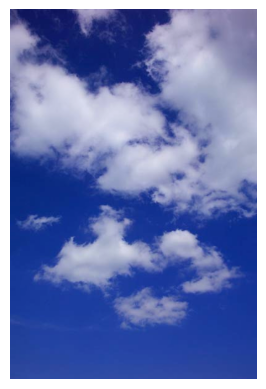

In [66]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [67]:
image.shape

(600, 400, 3)

### Question: 
What do the dimensions of the image array represent?

(height, width, depth)

The height and width of an image determine its dimensions, while the depth, typically set at three, corresponds to the three channels in the RGB color model: Red, Green, and Blue. This depth indicates that each pixel in the image is represented by a combination of these three primary colors.

### Assignment 1: 
Crop the image, so it becomes square by chopping off the bottom part.

In [68]:
height, width, depth = image.shape

cropped_image = image[:image.shape[1], :image.shape[1]]

cv2.imshow('Cropped Image', cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

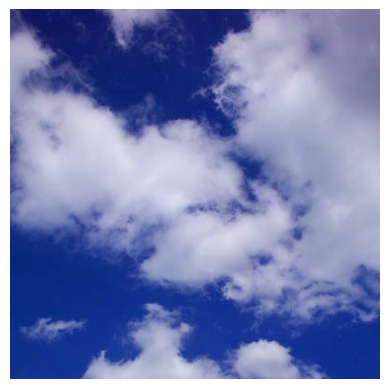

In [69]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Assignment 2: 
Discolor the image by reducing the intensity of the red value of every pixel by half

In [70]:
discolored_image = image.copy()
discolored_image[:, :, 2] = discolored_image[:, :, 2] // 2

cv2.imshow('Discolored Image', discolored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

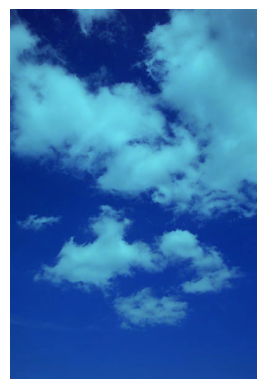

In [71]:
plt.imshow(cv2.cvtColor(discolored_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Assignment 3: 
Discolor the image by doubling the intensity of the red value of every pixel. You may have to handle an overflow problem (and use two more lines of code).

In [72]:
discolored_image = image.copy()

discolored_image[:, :, 2] = np.clip(discolored_image[:, :, 2] * 2, 0, 255).astype(np.uint8)

cv2.imshow('Discolored Image', discolored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

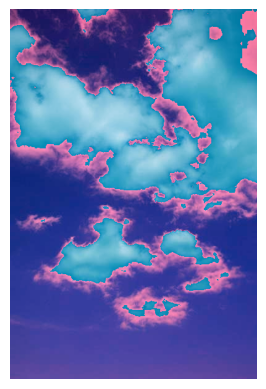

In [73]:
plt.imshow(cv2.cvtColor(discolored_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Assignment 4: 
Make a regular grid of black dots on the image so that the dots are 10 pixels apart vertically
and horizontally, like in the image below.

In [74]:
grid_image = image.copy()

spacing = 10
[cv2.circle(grid_image, (x, y), 1, (0, 0, 0), -1) for y in range(0, height, spacing) for x in range(0, width, spacing)]

cv2.imshow('Image with Grid', grid_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

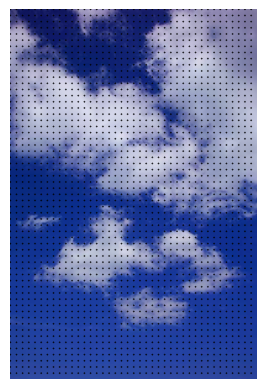

In [75]:
plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Exercise 2
### Assignment 5
Convert the image to a grayscale image

In [76]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Grayscale Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

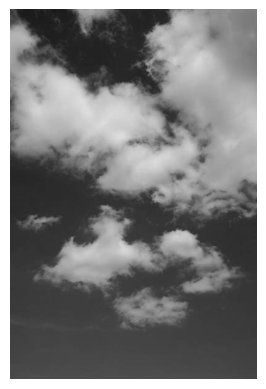

In [77]:
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Assignment 6

Threshold the grayscale image at 50% of the maximum value for this datatype.

In [78]:
_, threshold_image = cv2.threshold(gray_image, 0.5 * np.max(gray_image), 255, cv2.THRESH_BINARY)

cv2.imshow('Thresholded Image', threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


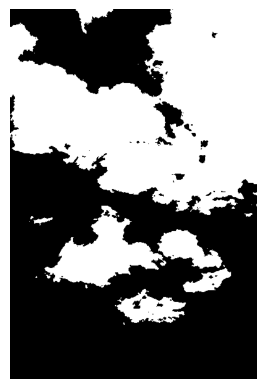

In [79]:
plt.imshow(cv2.cvtColor(threshold_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Assignment 7
Threshold the grayscale image at the ideal threshold determined by Otsu’s method.

In [80]:
_, otsu_threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2.imshow('Otsu Thresholded Image', otsu_threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

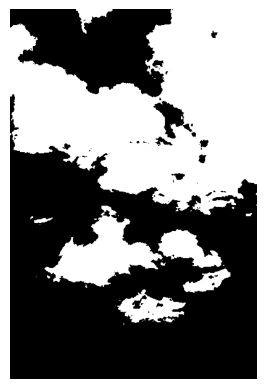

In [81]:
plt.imshow(cv2.cvtColor(otsu_threshold_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Exercise 3

### Assignment 8:
Adaptively threshold the grayscale version of painting2.jpg so you get a similar result
to the one below, where the background is uniformly white, and you can cut out the painting along black
lines.

In [82]:
image = cv2.imread('./source_images/painting2.jpg')

In [83]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

adaptive_threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 9)

cv2.imshow('Adaptive Thresholded Image', adaptive_threshold_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


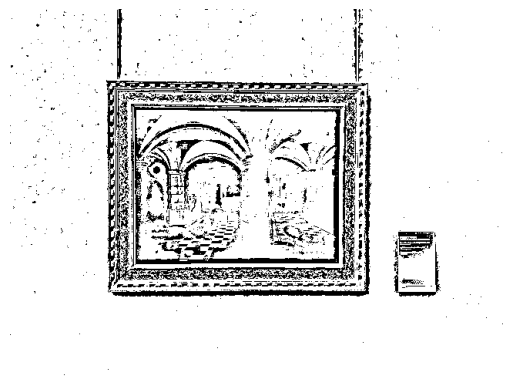

In [84]:
plt.imshow(cv2.cvtColor(adaptive_threshold_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Exercise 4
### Assignment 9:

Remove the white noise from whitenoise.png by Gaussian filtering. Find parameters for
the Gaussian kernel that you find strike a good balance between noise level and blurriness of the result. This
is subjective, but experiment with it!

In [85]:
image = cv2.imread('./source_images/whitenoise.png')

filtered_image = cv2.GaussianBlur(image, (15, 15), 0)

cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


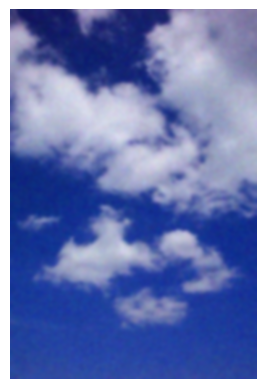

In [86]:
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Question 2:
Can you choose the kernel size and sigma of the distribution independent of each other?

Yes, you can choose the kernel size and sigma independently of each other. The kernel size is the size of the filter that goes over the image and needs to be an odd number, so the kernel has a center.

The sigma value is the standard deviation of the Gaussian distribution, this determines the amount of blur. When you specify sigma as zero, it will be calculated from the kernel size. You can give a value different from zero, this will then be a value independent of the kernel size. When both of the kernel size and sigma are small, the filter may not have much effect and when they are both large, the filter may blur to much.

It's not wisely to set them independently as the kernel and sigma of the Gaussian function are correlated with each other. Best practice is choosing one of the two to fine tune and let the other one be calculated based on that.

## Exercise 5
### Assignment 10:

Test the Gaussian filter on saltandpeppernoise.png.

In [87]:
image = cv2.imread('./source_images/saltandpeppernoise.png')

filtered_image = cv2.GaussianBlur(image, (5, 5), 0)

cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


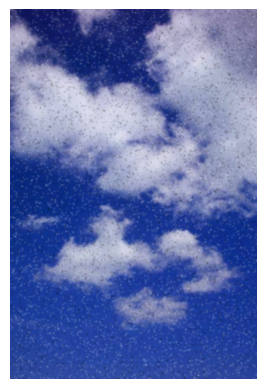

In [88]:
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Assignment 11:

Apply median filtering on the same image.

In [89]:
filtered_image = cv2.medianBlur(image, 5)

cv2.imshow('Filtered Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


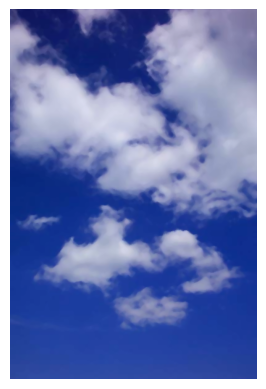

In [90]:
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Question 3:
Which result is preferable and why?

The image with the median blur looks the best, here we don't see the noise anymore. With the Gaussian blur we still see the noise, it's just more blurry. The median blur here is more successful in getting rid of the noise.

## Exercise 6

### Assignment 12:
Implement unsharp masking to sharpen unsharp.png. Make sure you do not get overflow in your datatype! Your goal is to achieve something similar to the image below.

In [91]:
image = cv2.imread('./source_images/unsharp.png')

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

difference_image = cv2.subtract(image, blurred_image)

factor = 13  

sharpened_image = cv2.addWeighted(image, 1.0, difference_image, factor, 0)

sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)

combined_image = np.concatenate((image[:, :image.shape[1] // 2], sharpened_image[:, image.shape[1] // 2:]), axis=1)

cv2.imshow('Sharpened Image', combined_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

libpng warning: iCCP: known incorrect sRGB profile


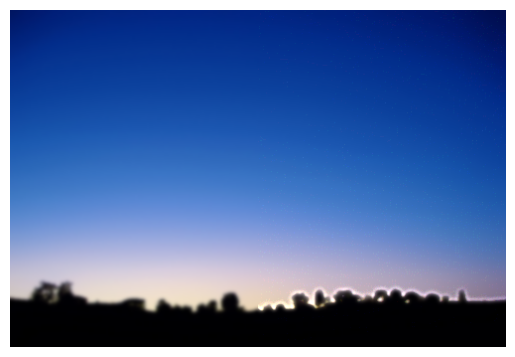

In [92]:
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Exercise 7

### Assignment 13:
Write a program that blurs blots.png diagonally with the kernel below (mind the multiplication factor in front).

In [93]:
image = cv2.imread('./source_images/blots.png')

kernel = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]) / 7.0

diagonal_blur = cv2.filter2D(image, -1, kernel)

cv2.imshow('Diagonal Blur', diagonal_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()


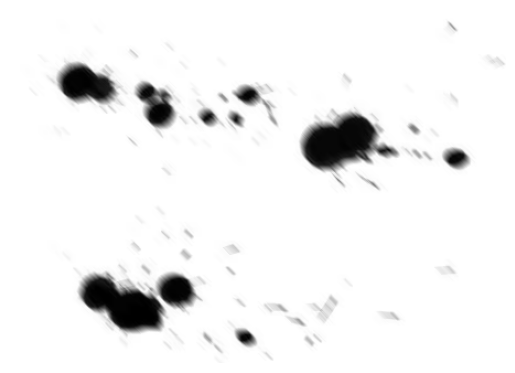

In [94]:
plt.imshow(cv2.cvtColor(diagonal_blur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [95]:
kernel_8x8 = kernel[:8, :8]

anchor_point = (7, 7)

diagonal_blur_8x8 = cv2.filter2D(image, -1, kernel_8x8, anchor=anchor_point)

cv2.imshow('Diagonal Blur with 8x8 Kernel', diagonal_blur_8x8)
cv2.waitKey(0)
cv2.destroyAllWindows()

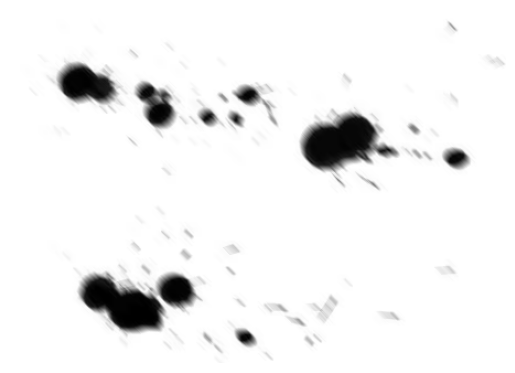

In [96]:
plt.imshow(cv2.cvtColor(diagonal_blur_8x8, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Question 4:
You can achieve the same result with a 8x8 kernel, by moving the anchor point. What coordinates will you specify for the anchor point?

To receive the same result as the bigger kernel, you need to set the anchor point of the smaller kernel to the bottom right of the kernel. So (7, 7) is the correct anchor point.